In [2]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
print(df.head())

   Survived   Age  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0         0  22.0       False      True     False     False      True
1         1  38.0        True     False      True     False     False
2         1  26.0        True     False     False     False      True
3         1  35.0        True     False      True     False     False
4         0  35.0       False      True     False     False      True


In [5]:
print(df)

     Survived   Age  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0           0  22.0       False      True     False     False      True
1           1  38.0        True     False      True     False     False
2           1  26.0        True     False     False     False      True
3           1  35.0        True     False      True     False     False
4           0  35.0       False      True     False     False      True
..        ...   ...         ...       ...       ...       ...       ...
885         0  39.0        True     False     False     False      True
886         0  27.0       False      True     False      True     False
887         1  19.0        True     False      True     False     False
889         1  26.0       False      True      True     False     False
890         0  32.0       False      True     False     False      True

[714 rows x 7 columns]


In [6]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
model.score(x_test, y_test)

0.8321678321678322

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

In [10]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[78,  7],
       [17, 41]])

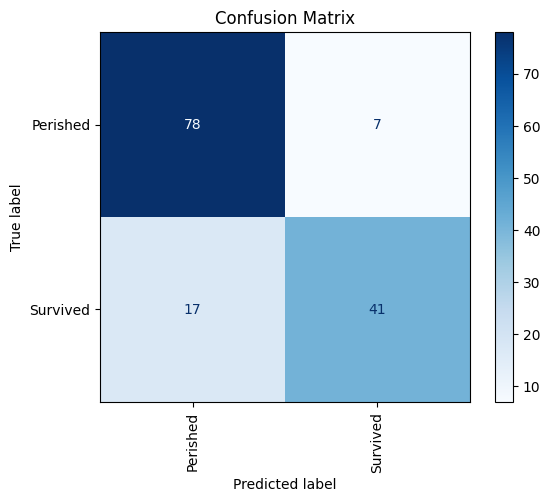

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Perished', 'Survived'])
disp.plot(cmap='Blues')

# Optional: customize the plot further
plt.xticks(rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



In [13]:
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


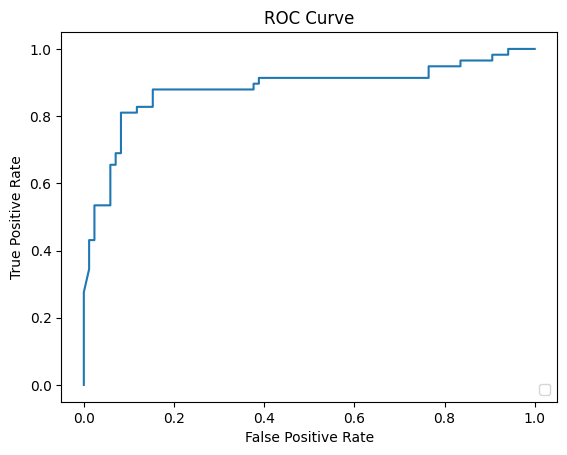

In [14]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Create the ROC curve display
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

# Add labels and title if desired
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()